<a href="https://www.kaggle.com/code/amanyazdani2602/titanic-dataset-survival-prediction?scriptVersionId=159267922" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing the Libraries & Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Importing and Preprocessing

In [2]:
df=pd.read_csv('/kaggle/input/titanic-survival-dataset/train.csv')

In [3]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
#The rows and columns in the df
df.shape

(891, 12)

In [5]:
#getting the general info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking the null values in the features
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have some null values in the the feature Age, Cabin and Embarked


In [7]:
#dropping the feature Cabin because majority of the data is null
df= df.drop(columns='Cabin', axis=1)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [8]:
#treating the null values for Age
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
#finding which Embarked category is the majority of the passengers
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [10]:
#the majority of the passengers are from 'S' so lets replace the null values in the Embarked column with S
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace= True)

In [11]:
#checking if the null values were eradicated
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

null values sucessfully taken care of

# Data Analysis

In [12]:
#I generally use pandas profiling to get good idea of the kind of data I'm dealing with and some key information about the data
from pandas_profiling import ProfileReport
profile= ProfileReport(df, title='Report', explorative=True)
profile

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_18/3340494909.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [14]:
#figuring out how many passengers survived and how many didn't
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

0 - Not Survived
1 - Survived

# Data Visualization

In [15]:
sns.set()

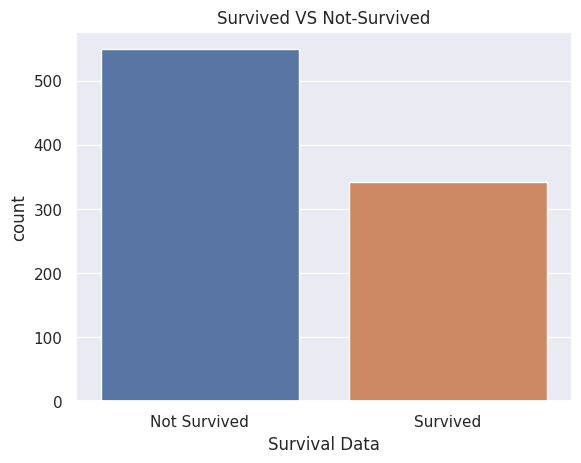

In [16]:
#plotting survivors 
sns.countplot(x= 'Survived', data= df)
plt.xticks([0,1],['Not Survived','Survived'])
plt.xlabel('Survival Data')
plt.title('Survived VS Not-Survived')
plt.show()

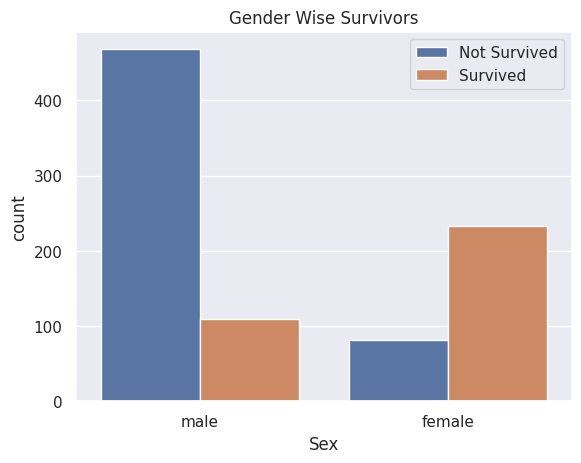

In [17]:
#plotting the number of survivors with respect to gender
sns.countplot(x= 'Sex', hue= 'Survived', data= df)
plt.legend(labels=['Not Survived', 'Survived'])
plt.title('Gender Wise Survivors')
plt.show()

Observation:- 
* more females survived than males

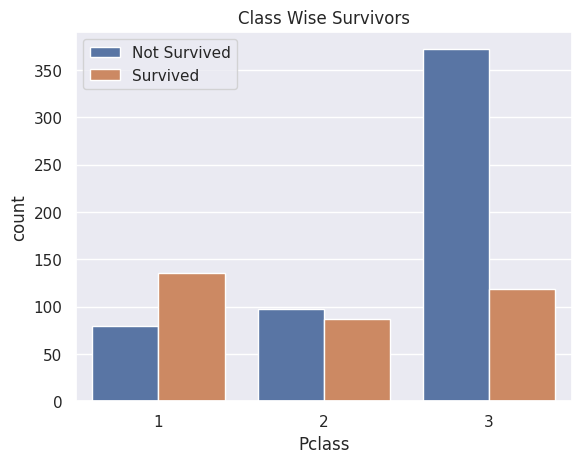

In [18]:
#plotting survivors based on class
sns.countplot(x= 'Pclass', hue= 'Survived', data= df)
plt.legend(labels=['Not Survived', 'Survived'])
plt.title('Class Wise Survivors')
plt.show()

observation:- 
* majority survivors were from class 1 then class 3 followed by class 2
* but the survial ratio was higher in class 1, was almost the same for class 2, but for class three majority of the passengers didn't survive

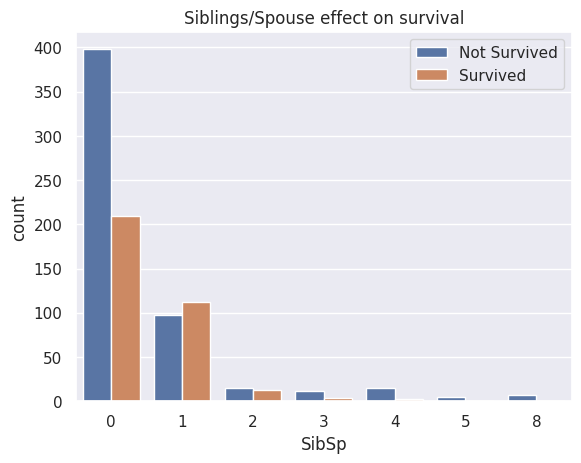

In [19]:
#plotting survivors based on siblings and spouse on board
sns.countplot(x= 'SibSp', hue= 'Survived', data= df)
plt.legend(labels=['Not Survived', 'Survived'])
plt.title('Siblings/Spouse effect on survival')
plt.show()

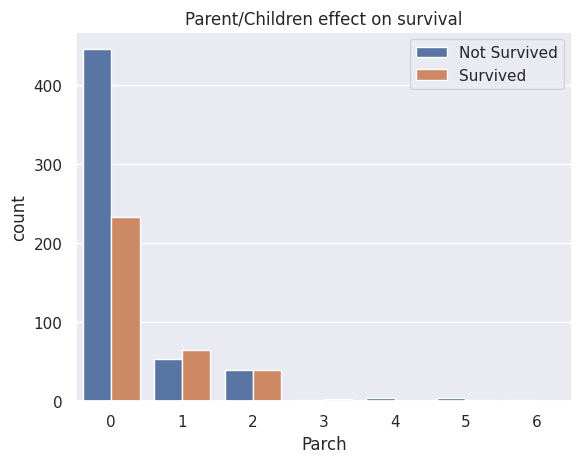

In [20]:
#plotting survivors based on parent and children on board
sns.countplot(x= 'Parch', hue= 'Survived', data= df)
plt.legend(labels=['Not Survived', 'Survived'])
plt.title('Parent/Children effect on survival')
plt.show()

Observation:-
* For both SibSp and ParCh it can be observed that people with no SibSp or Parch on board has the highest survival rate
* Clearly observable that passengers with no-one/less people to worry about on board has more survival rate  

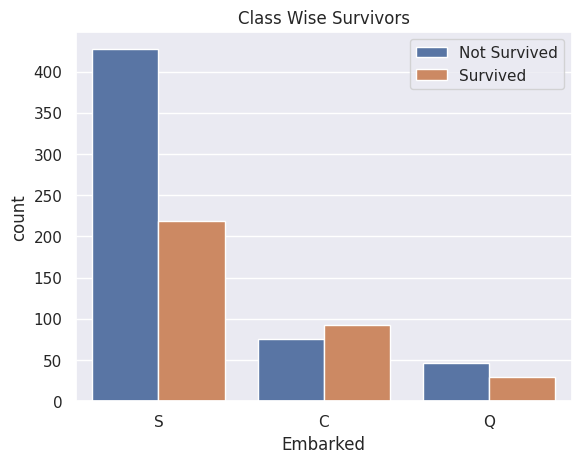

In [21]:
#plotting survivors based on class
sns.countplot(x= 'Embarked', hue= 'Survived', data= df)
plt.legend(labels=['Not Survived', 'Survived'])
plt.title('Class Wise Survivors')
plt.show()

Observation:-
* Passengers embarked from Southampton has the highest rate of survival
* Followed by Cherbourg and Queenstown

# Data Preprocessing

In [22]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [24]:
#converting categorical values to numerical values
df.replace({'Sex':
                {'male': 0,
                 'female': 1},
            'Embarked':
                {'S': 0,
                 'C': 1,
                 'Q': 2}}, inplace= True)

In [25]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         0  
1          PC 17599  71.2833         1  
2  STON/O2. 3101282   7.9250         0  
3            113803  53.1000         0  
4            373450   8.0500         0

Categorical data converted to numerical data 

In [26]:
#dropping columns irrelevant for predicting the survival rate
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace= True)

In [27]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         0
1         1       1    1  38.0      1      0  71.2833         1
2         1       3    1  26.0      0      0   7.9250         0
3         1       1    1  35.0      1      0  53.1000         0
4         0       3    0  35.0      0      0   8.0500         0

Columns dropped

# Splitting Features and Target for Model Training

In [28]:
X= df.drop(['Survived'], axis=1)
Y= df['Survived']

In [29]:
X.head()

Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0

In [30]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Splitting Training and Testing data

In [31]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, random_state=2)

# Model Training

In [32]:
model= LogisticRegression()

In [33]:
model.fit(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [34]:
#accuracy of the model 
model.score(X_test, Y_test)

0.7821229050279329

In [35]:
from sklearn.metrics import confusion_matrix
Y_predicted= model.predict(X_test)
cm= confusion_matrix(Y_test, Y_predicted)
cm

array([[91,  9],
       [30, 49]])

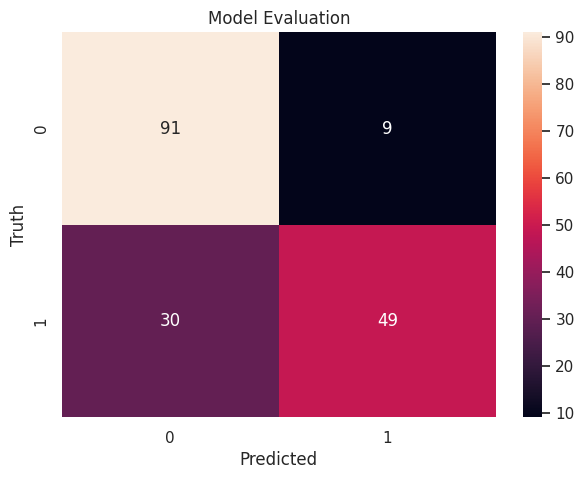

In [36]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.title('Model Evaluation')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()